In [1]:
# data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.cluster import KMeans
from pamAlgorithm import clusterPam

# system
import os

In [3]:
# load data 
X = pd.read_csv(f'{os.getcwd()}{os.sep}data{os.sep}X.csv')
y = pd.read_csv(f'{os.getcwd()}{os.sep}data{os.sep}y.csv')

## Data visualization

In [5]:
# transform labels to colors
def yToColor(y):
    if y == 't':
        return 0
    if y == 'o':
        return 1
    if y == 'k':
        return 2
    
yColor = y.Klasa.apply(lambda x: yToColor(x))

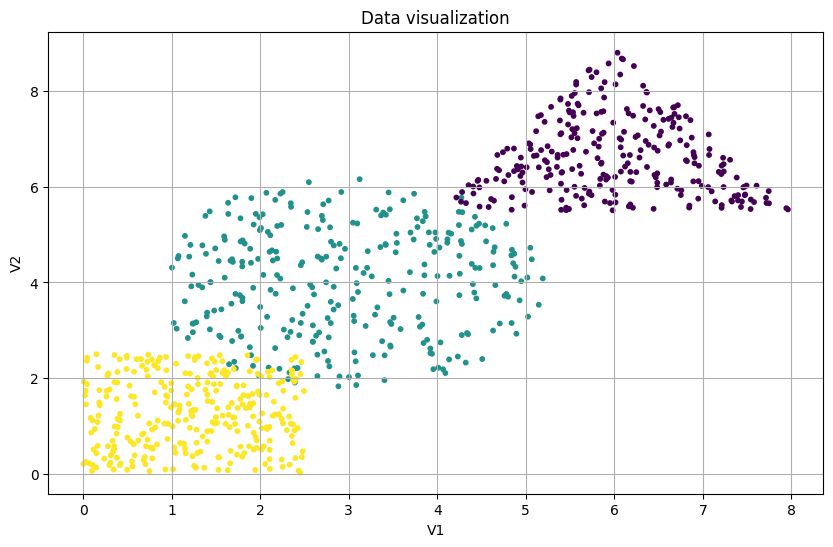

In [6]:
# plot a graph
plt.figure(figsize=(10, 6))
plt.scatter(X.V1, X.V2, c = yColor, s=10)
plt.title('Data visualization')
plt.xlabel('V1')
plt.ylabel('V2')
plt.grid(True)
plt.show()

## Comparison of K-Means and K-Medoids (PAM algorithm) Methods 

In [7]:
# k-medoids method
medoids, labels = clusterPam(X, k=3, metric='euclidean')

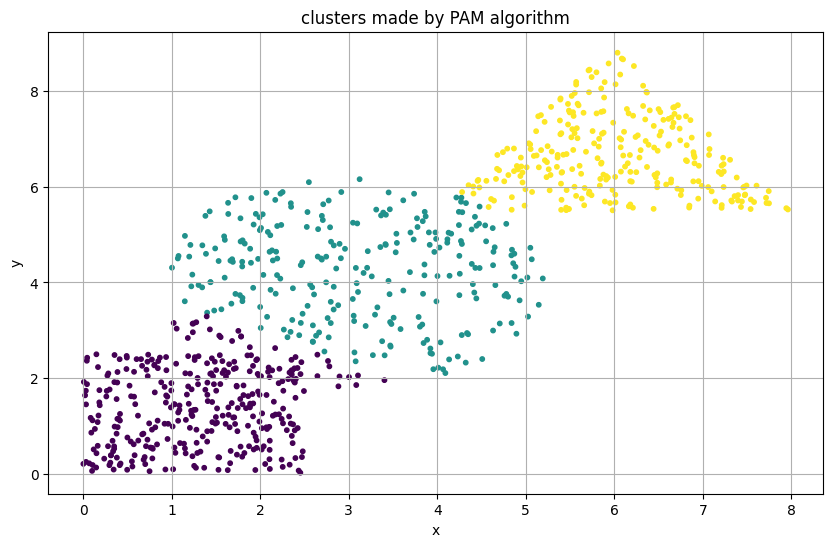

In [9]:
# visualize pam clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.V1, X.V2, c = labels, s=10)
plt.title('clusters made by PAM algorithm')
plt.xlabel('V1')
plt.ylabel('V2')
plt.grid(True)
plt.show()

In [22]:
# k-means method
kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

KMeans(n_clusters=3)

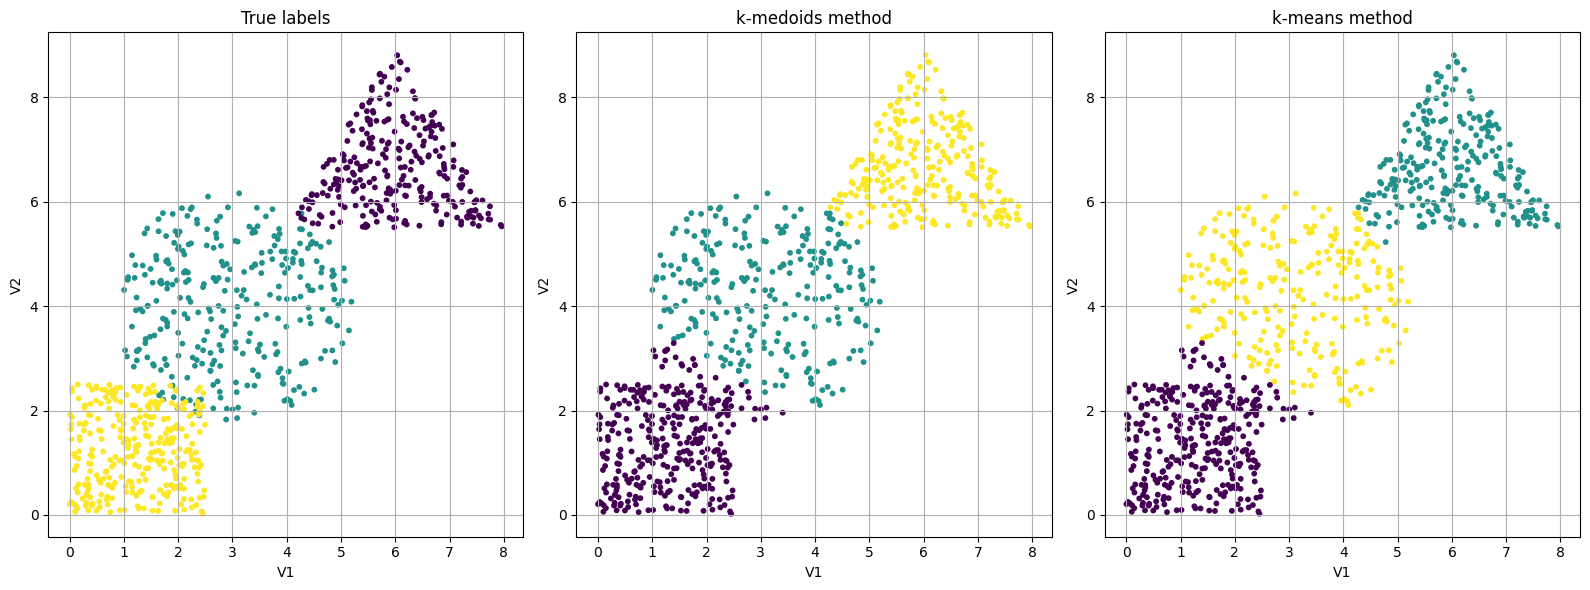

In [23]:
# visual comparision of different methods

fig, axs = plt.subplots(1,3, figsize=(16,6))

axs[0].scatter(X.V1, X.V2, c = yColor, s=10)
axs[0].set_title('True labels')
axs[0].grid()
axs[0].set_xlabel('V1')
axs[0].set_ylabel('V2')

axs[1].scatter(X.V1, X.V2, c = labels, s=10)
axs[1].set_title('k-medoids method')
axs[1].grid()
axs[1].set_xlabel('V1')
axs[1].set_ylabel('V2')

axs[2].scatter(X.V1, X.V2, c = kMeans.labels_, s=10)
axs[2].set_title('k-means method')
axs[2].grid()
axs[2].set_xlabel('V1')
axs[2].set_ylabel('V2')

plt.tight_layout()
plt.show()

Both methods performed fairly well. However, the clusters were not perfectly reproduced, and the cluster "boundaries" were slightly shifted.

Since our dataset is a subset of $\R^2$, identifying three clusters was relatively straightforward. However, in most cases, the optimal number of clusters is unknown. Therefore, we analyze the behavior of the algorithms for different cluster counts. Additionally, for the K-Medoids method, we examine the impact of various distance metrics on the clustering results.

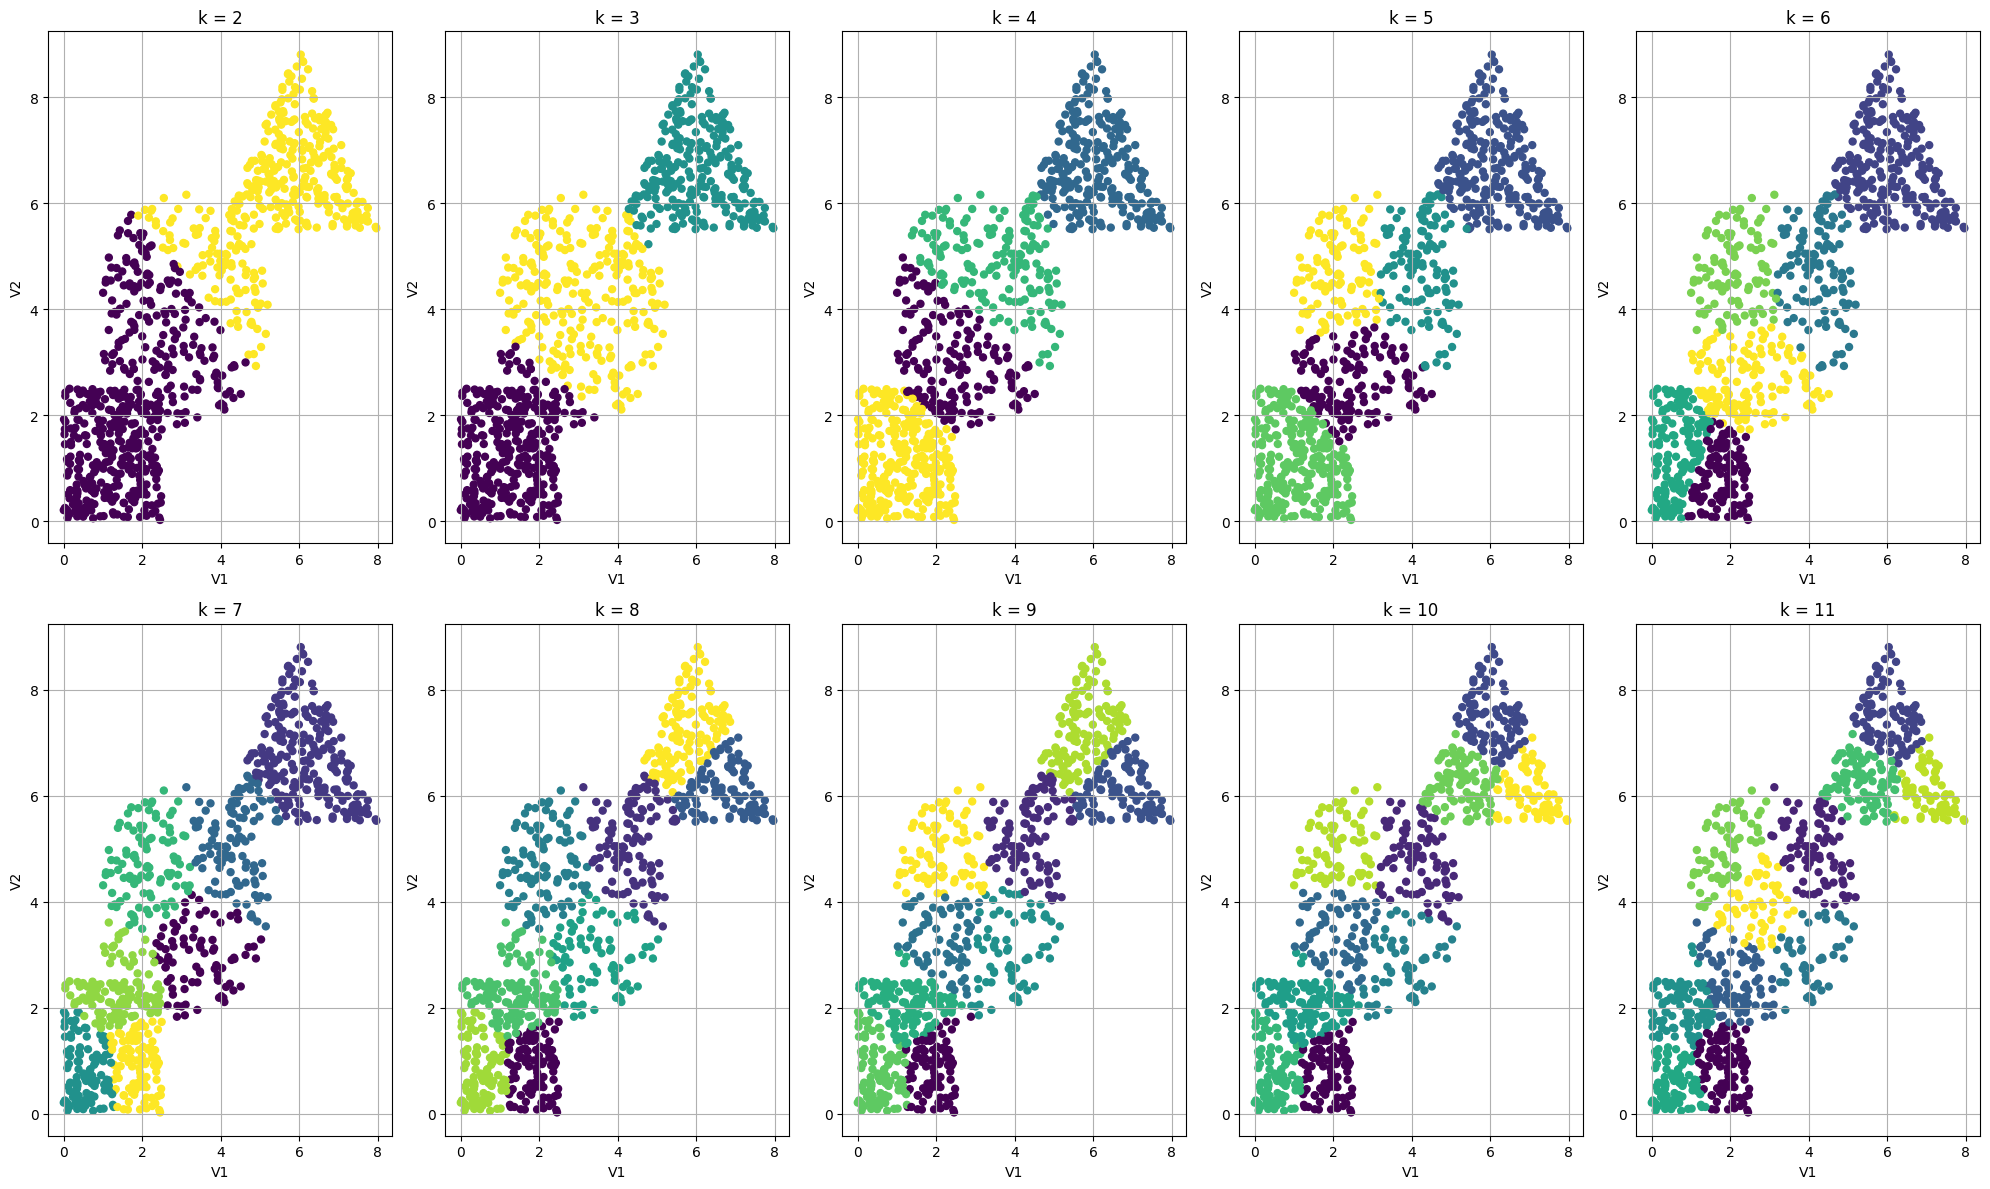

In [20]:
# visualize different number of clusters

fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

for i, k in enumerate(range(2, 12)):
    _, labels = clusterPam(X, k=k, metric='euclidean')
    
    axs[i].scatter(X.V1, X.V2, c=labels, cmap='viridis', s=25)
    axs[i].set_title(f"k = {k}")
    axs[i].set_xlabel("V1")
    axs[i].set_ylabel("V2")
    axs[i].grid()
plt.tight_layout()
plt.show()

Futhermore, we will test the impact of different distance metrics on the clustering results.

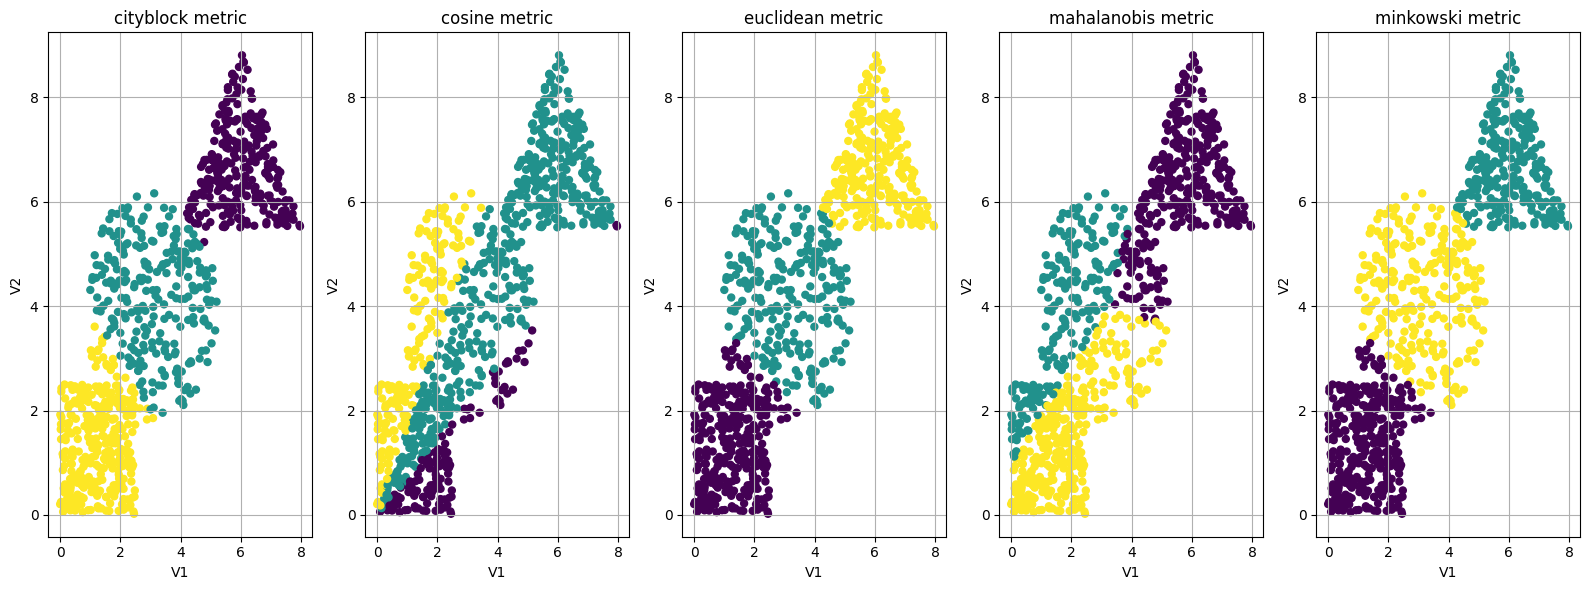

In [24]:
metrics = ['cityblock', 'cosine', 'euclidean', 'mahalanobis', 'minkowski']

fig, axs = plt.subplots(1, 5, figsize=(16, 6))
axs = axs.flatten()

for i in range(5):
    _, labels = clusterPam(X, k=3, metric=metrics[i])
    
    axs[i].scatter(X.V1, X.V2, c=labels, cmap='viridis', s=25)
    axs[i].set_title(f"{metrics[i]} metric")
    axs[i].set_xlabel("V1")
    axs[i].set_ylabel("V2")
    axs[i].grid()

# Dopasowanie rozkładu wykresów
plt.tight_layout()
plt.show()

It is evident that the choice of distance metric has a significant impact on the formation of clusters. In this task, the Manhattan, Euclidean, and Minkowski metrics yielded satisfactory results, whereas the Cosine and Mahalanobis metrics produced only moderately effective outcomes.

## PAM algorithm on a more complex dataset.

In [33]:
data = pd.read_csv(f'{os.getcwd()}{os.sep}data{os.sep}complexData.csv', index_col=0)
# split data 
X = data[['X1', 'X2']]
y = data.label

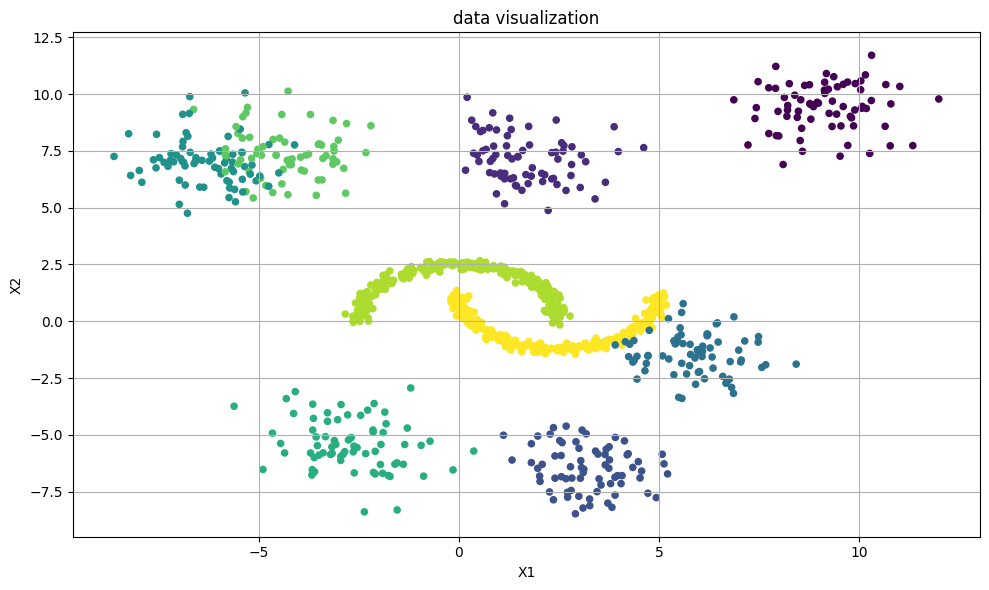

In [35]:
# visualize data
plt.figure(figsize=(10, 6))
plt.scatter(X.X1, X.X2, c = y, s=20)
plt.title('data visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()

We can observe that the dataset contains 9 clusters, so we will evaluate how the different algorithms performed.

## Comparison of K-Means and K-Medoids (PAM algorithm) Methods

In [36]:
# k-medoids
_, labels = clusterPam(X, k=9)

# k-means
kMeans = KMeans(n_clusters=9)
kMeans.fit(X)

KMeans(n_clusters=9)

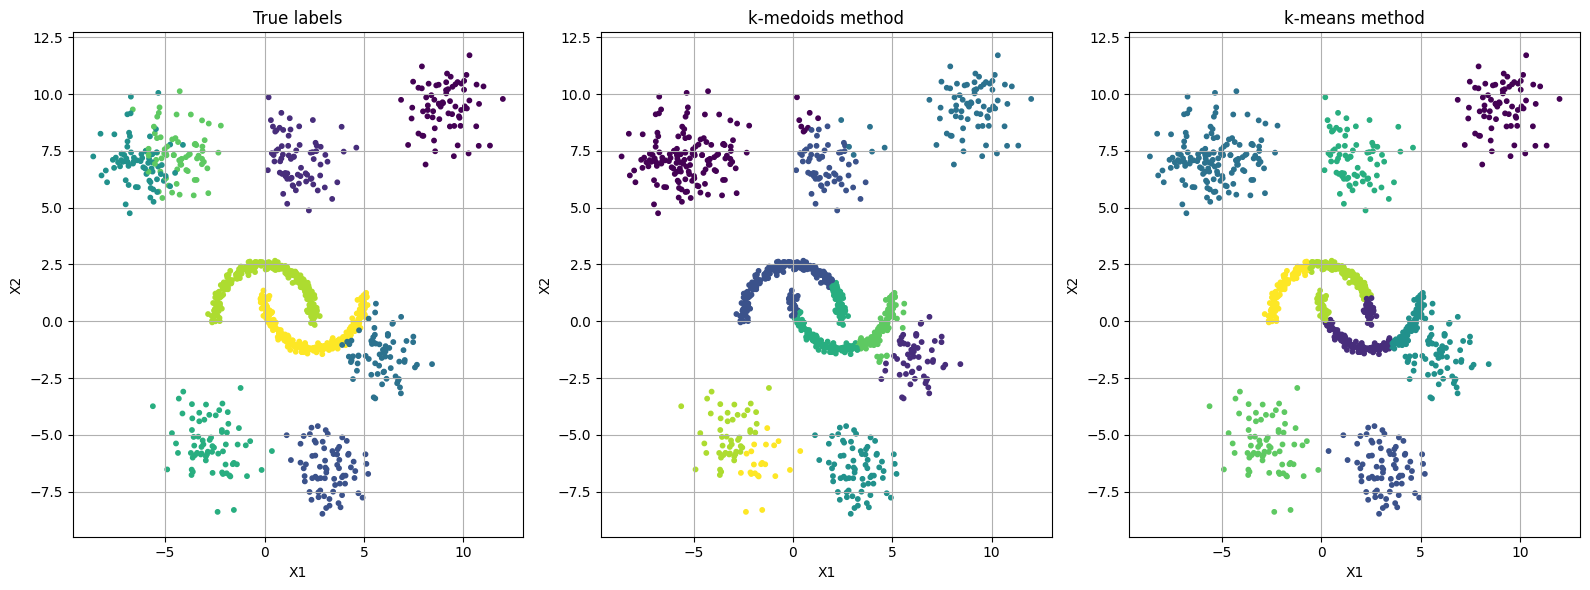

In [39]:
fig, axs = plt.subplots(1,3, figsize=(16,6))

axs[0].scatter(X.X1, X.X2, c = y, s=10)
axs[0].set_title('True labels')
axs[0].grid()
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[1].scatter(X.X1, X.X2, c = labels, s=10)
axs[1].set_title('k-medoids method')
axs[1].grid()
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

axs[2].scatter(X.X1, X.X2, c = kMeans.labels_, s=10)
axs[2].set_title('k-means method')
axs[2].grid()
axs[2].set_xlabel('X1')
axs[2].set_ylabel('X2')

plt.tight_layout()
plt.show()

Despite correctly setting the number of clusters, both methods performed rather poorly.

Finally, we will test the impact of different distance metrics on the quality of clustering using the K-Medoids method.

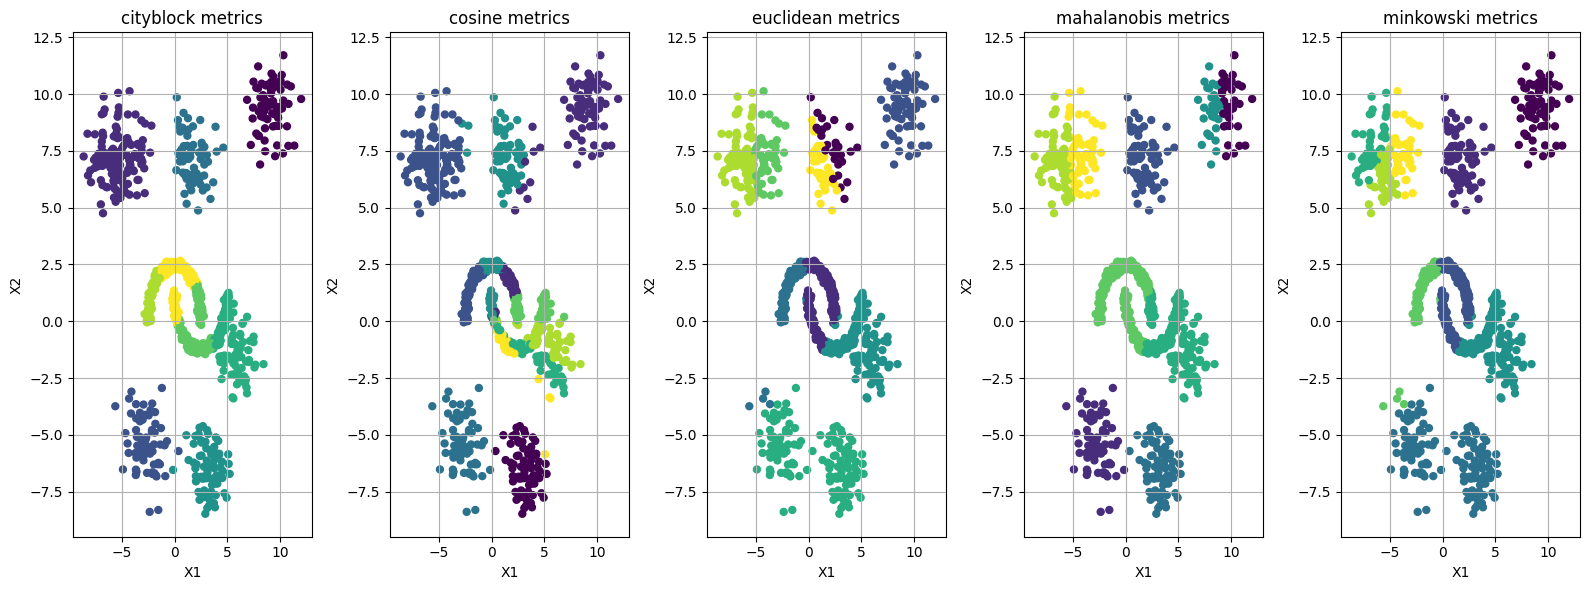

In [40]:
metrics = ['cityblock', 'cosine', 'euclidean', 'mahalanobis', 'minkowski']

fig, axs = plt.subplots(1, 5, figsize=(16, 6))
axs = axs.flatten()

for i in range(5):
    _, labels = clusterPam(X, k=9, metric=metrics[i])
    
    axs[i].scatter(X.X1, X.X2, c=labels, cmap='viridis', s=25)
    axs[i].set_title(f"{metrics[i]} metrics")
    axs[i].set_xlabel("X1")
    axs[i].set_ylabel("X2")
    axs[i].grid()

plt.tight_layout()
plt.show()    